## Описание проекта

Целью данного проекта является провести маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки, и в задачу проекта входит выявление причин убытков и поиск точек роста.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,  
- выгрузка их покупок за этот период,  
- рекламные расходы.  

В ходе проекта предстоит изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,  
- сколько стоит привлечение пользователей из различных рекламных каналов;  
- сколько денег приносит каждый клиент,  
- когда расходы на привлечение клиента окупаются,  
- какие факторы мешают привлечению клиентов.  

В ходе выполнения проекта нужно составить профили пользователей, определить минимальную и максимальную даты привлечения пользователей, выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны, узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


### Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
costs=pd.read_csv('/datasets/costs_info_short.csv')

In [ ]:
def data_review (data):
    print('Первые 10 строк:')
    display(data.head(10))
    print('Последние 10 строк:')
    display(data.tail(10))
    print('ТИПЫ ДАННЫХ\n')
    display(data.info())
#    print('СТАТИСТИЧЕСКАЯ СВОДКА')
#   display(data.describe()) - строка в данном проекте не нужна
    print('ПРОПУСКИ\n')

    for element in data.columns:
        if data[element].isna().sum() > 0:
            print(element, ' - ', data[element].isna().sum(), 'пропусков')
            count = +1
        else: print('Пропусков НЕТ\n')
    print('\nПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДУБЛИКАТЫ\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [ ]:
data_review (visits)

Первые 10 строк:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


Последние 10 строк:


,User Id,Region,Device,Channel,Session Start,Session End
309891,136940622331,France,Android,AdNonSense,2019-10-31 17:12:29,2019-10-31 17:15:11
309892,69556000475,UK,iPhone,AdNonSense,2019-10-31 01:26:31,2019-10-31 01:39:21
309893,805154517300,France,iPhone,LeapBob,2019-10-31 07:07:13,2019-10-31 07:38:52
309894,207948856745,France,PC,WahooNetBanner,2019-10-31 11:38:01,2019-10-31 11:50:29
309895,95774241409,UK,PC,OppleCreativeMedia,2019-10-31 11:14:15,2019-10-31 11:50:29
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


In [ ]:
data_review (orders)

Первые 10 строк:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


Последние 10 строк:


,User Id,Event Dt,Revenue
40202,981966082461,2019-10-31 15:19:00,4.99
40203,43843333146,2019-10-31 21:45:38,4.99
40204,436309219475,2019-10-31 18:49:29,4.99
40205,662522538439,2019-10-31 09:38:22,4.99
40206,580962171213,2019-10-31 03:23:40,4.99
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


In [ ]:
data_review (costs)

Первые 10 строк:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Последние 10 строк:


,dt,Channel,costs
1790,2019-10-18,lambdaMediaAds,8.0
1791,2019-10-19,lambdaMediaAds,5.6
1792,2019-10-20,lambdaMediaAds,8.8
1793,2019-10-21,lambdaMediaAds,7.2
1794,2019-10-22,lambdaMediaAds,6.4
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


dt         0.0
Channel    0.0
costs      0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


Первый датафрейм - visits, он содержит 309901 запись, пропусков и дубликатов в нем не обнаружено. Ненадлежащий формат данных в столбцах Session Start и Session End (object). Сразу приведем к нужному формату данных datetime и исправим названия столбцов.

In [ ]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


 Второй датасет orders содержит данные о покупках, в нем 40212 строк, пропусков и дубликатов не обнаружено.Также есть ненадлежащий тип данных в столбце Event Dt  (object), который также сразу можно поменять на формат даты, и также исправим названия столбцов.  

In [ ]:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders['event_dt']=pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Третий датасет costs содержит данные о покупках, в нем 1800 строк, пропусков и дубликатов не обнаружено. Нам нужно исправить регистр названия колонок. Формат даты будет исправлен позже.

In [ ]:
costs.columns = ['dt', 'channel', 'costs']
#costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Первый датафрейм - visits, содержит 309901 запись, пропусков и дубликатов не обнаружено. Формат данных в столбцах Session Start и Session End (object) приведен к нужному формату данных datetime, названия столбцов исправлены. Второй датасет orders содержит данные о покупках, в нем 40212 строк, пропусков и дубликатов не обнаружено, тип данных в столбце Event Dt исправлен на формат даты, и также изменили названия столбцов на snake_case.Третий датасет costs содержит данные о покупках, в нем 1800 строк, пропусков и дубликатов не обнаружено, изменили названия колонок.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции из теоретических уроков.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # проверим, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )
     # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    #print (ad_costs['costs'].unique())
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    #print ('profiles', profiles['dt'].unique(), profiles['channel'].unique() )
    #print ('ad_costs', ad_costs['dt'].unique(), ad_costs['channel'].unique() )
    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.


In [ ]:
profiles = get_profiles(visits, orders, costs) #с помощью функции get_profiles получаем профили
display (profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [ ]:
# Определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
observation_date = datetime(2019, 11, 1).date()# момент анализа
horizon_days=14
min_analysis_date, max_analysis_date, observation_date

(datetime.date(2019, 5, 1),
 datetime.date(2019, 10, 27),
 datetime.date(2019, 11, 1))

Допустим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Минимальная дата доступных данных - 1 мая 2019 года, максимальная - 27 октября 2019 г., это дает нам достаточный объем информации для анализа  </div>

- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Составим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
profile_region=profiles.groupby('region').agg({'user_id' : 'nunique'}).\
        sort_values(by='user_id', ascending=False)
profile_region['share']=(profile_region['user_id'])/(profile_region['user_id'].sum())*100
profile_region['paying_users']=profiles.query('payer==True').\
                groupby('region').agg({'user_id' : 'count'}).\
                sort_values(by='user_id', ascending=False)
profile_region['paying_share']=(
    profile_region['paying_users'])/(
    profile_region['paying_users'].sum())*100
profile_region['region_conv']=(profile_region['paying_users'])/(profile_region['user_id'])*100
profile_region

,user_id,share,paying_users,paying_share,region_conv
region,,,,,
United States,100002,66.664445,6902,77.716473,6.901862
UK,17575,11.716042,700,7.881995,3.982930
France,17450,11.632713,663,7.465376,3.799427
Germany,14981,9.986801,616,6.936156,4.111875


Наибольше количество пользователей из США - 100002, что составляет 66,66% от всего числа, на втором месте - Великобритания (17575 или 11,72%), на третьем Франция (17450 или 11,63%), и на четвертом - Германия (14981 или 9.99%). По количеству платящих пользователей распределение примерно такое же США - 6902 (77,7%), Великобритания 700 (7,88%), Франция 663 (7,47%) и Германия 616 (6,93%). Региональная конверсия в США 6,9%, в Великобритании 3,98%, во Франции 3,8%, в Германии - 4,11%.

- Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
profiles_device=profiles.groupby('device').agg({'user_id': 'nunique',
                                'payer': 'sum'})
profiles_device['share']=(profiles_device['payer']/profiles_device['user_id']*100).round(2)
profiles_device.sort_values(by='share', ascending=False)

,user_id,payer,share
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


Платящие пользователи распределены таким образом: Mac - 1912 (6.36%), iPhone - 3382 (6.21%), Android (5.85%), PC 1537 (5.05%), при этом в абсолютных показателях лидирует iPhone

In [ ]:
profiles_channel=profiles.groupby('channel').agg({'user_id': 'nunique',
                                'payer': 'sum'})
profiles_channel['share']=(profiles_channel['payer']/profiles_channel['user_id']*100).round(2)
profiles_channel.sort_values(by='share', ascending=False)

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439, на втором месте FaceBoom - 29144, на третьем TipTop - 19561. При этом в статус платящих больше всего перешли пользователи, привлеченные через FaceBoom (12.2%), затем AdNonSense (11.34%), и на третьем месте - lambdaMediaAds (10.47%).

Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439 (37,6%), на втором месте FaceBoom - 29144 (19,43%), на третьем TipTop - 19561 (13,04%). При этом в статус платящих  больше всего перешли пользователи, привлеченные через FaceBoom (2,37%), затем TipTop (1,25%), и на третьем месте - бесплатные (0,77%).  

В представленных датасетах нами получен достаточный для анализа объем данных.  
Наибольше количество пользователей из США - 100002, что составляет 66,66% от всего числа, на втором месте - Великобритания (17575 или 11,72%), на третьем Франция (17450 или 11,63%), и на четвертом - Германия (14981 или 9.99%). По количеству платящих пользователей распределение примерно такое же США - 6902 (77,7%), Великобритания 700 (7,88%), Франция 663 (7,47%) и Германия 616 (6,93%). Региональная конверсия в США 6,9%, в Великобритании 3,98%, во Франции 3,8%, в Германии - 4,11%.  
    По устройствам платящие пользователи распределены таким образом: Mac - 1912 (6.36%), iPhone - 3382 (6.21%), Android (5.85%), PC 1537 (5.05%), при этом в абсолютных показателях лидирует iPhone.
Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439, на втором месте FaceBoom - 29144, на третьем TipTop - 19561. Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439, на втором месте FaceBoom - 29144, на третьем TipTop - 19561. При этом в статус платящих больше всего перешли пользователи, привлеченные через FaceBoom (12.2%), затем AdNonSense (11.34%), и на третьем месте - lambdaMediaAds (10.47%).  
</div>

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.

In [ ]:
marketing_costs=costs['costs'].sum()
marketing_costs.round(2)

105497.3

- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
cost_channel=costs.groupby('channel').agg({'costs' : 'sum'}).\
        sort_values(by='costs', ascending=False)
cost_channel['share']=cost_channel['costs']/(cost_channel['costs'].sum())*100
cost_channel

,costs,share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

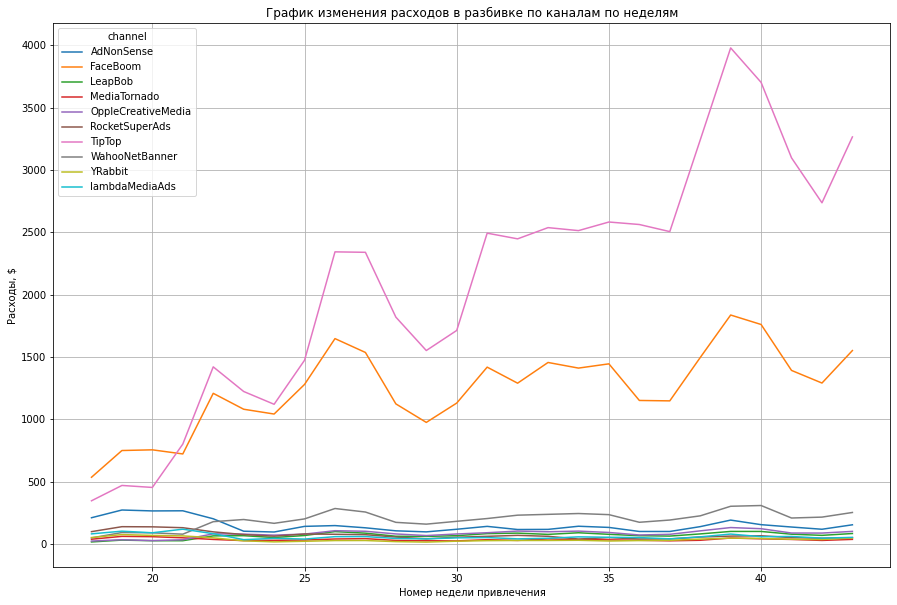

In [ ]:
costs['dt']=pd.to_datetime(costs['dt'])
costs['week']= costs['dt'].dt.isocalendar().week
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('Расходы, $')
plt.xlabel('Номер недели привлечения')
plt.title('График изменения расходов в разбивке по каналам по неделям')
plt.show()

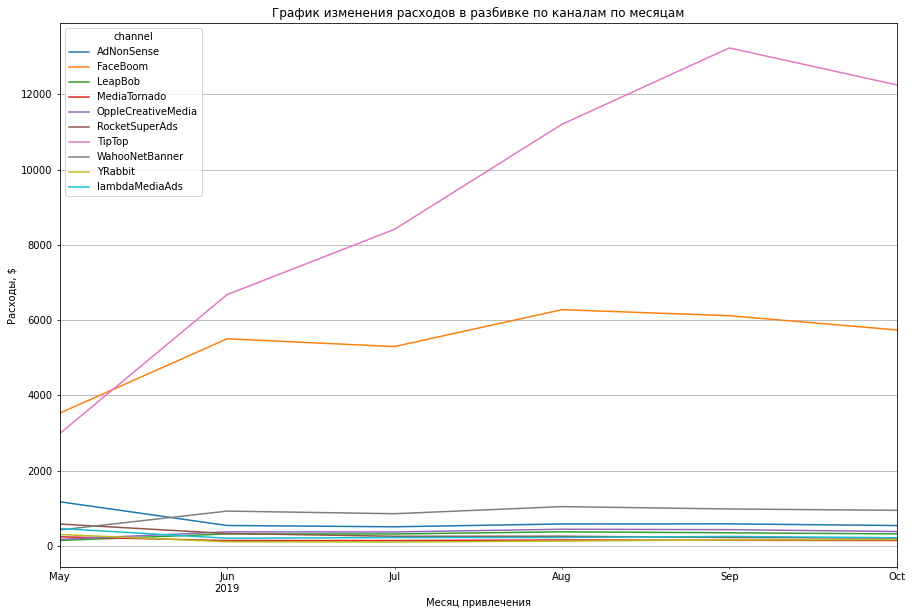

In [ ]:
costs['month']=costs['dt'].astype('datetime64[M]')
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('Расходы, $')
plt.xlabel('Месяц привлечения')
plt.title('График изменения расходов в разбивке по каналам по месяцам')
plt.show()

Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [ ]:
cac=profiles.query('acquisition_cost!=0')
cac=cac.groupby('channel').agg({'user_id' : 'count',
                                   'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
cac

,user_id,acquisition_cost
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Допустим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.


In [ ]:
profiles = profiles.query('channel != "organic"')

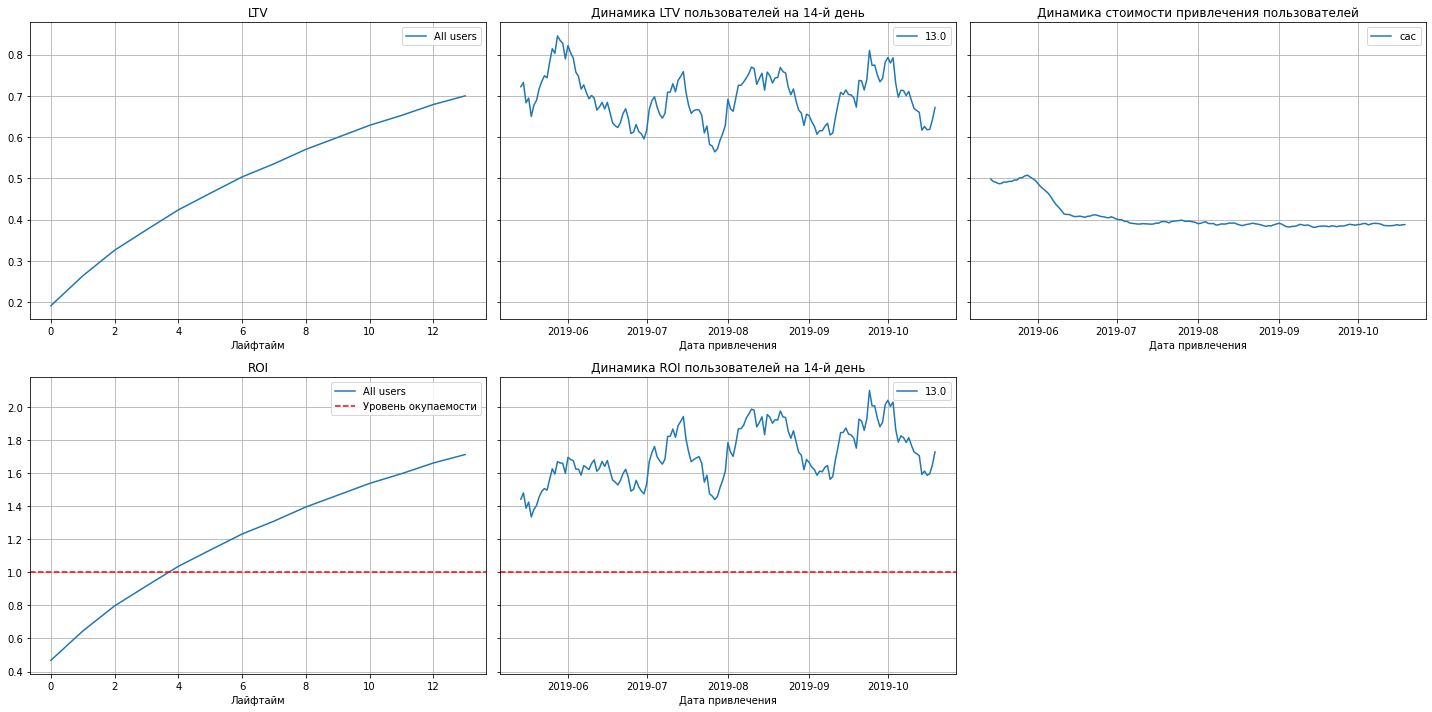

In [ ]:
dimensions = []

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

ВЫВОД:  
LTV держится на примерно одном уровне на протяжении всего периода наблюдений,  
CAC на протяжении всего эксперимента растёт,  
в разрезе лайфтайма общий ROI не достигает уровня окупаемости, в динамике до июня ROI выше уровня окупаемости, а с июля пользователи перестают окупаться

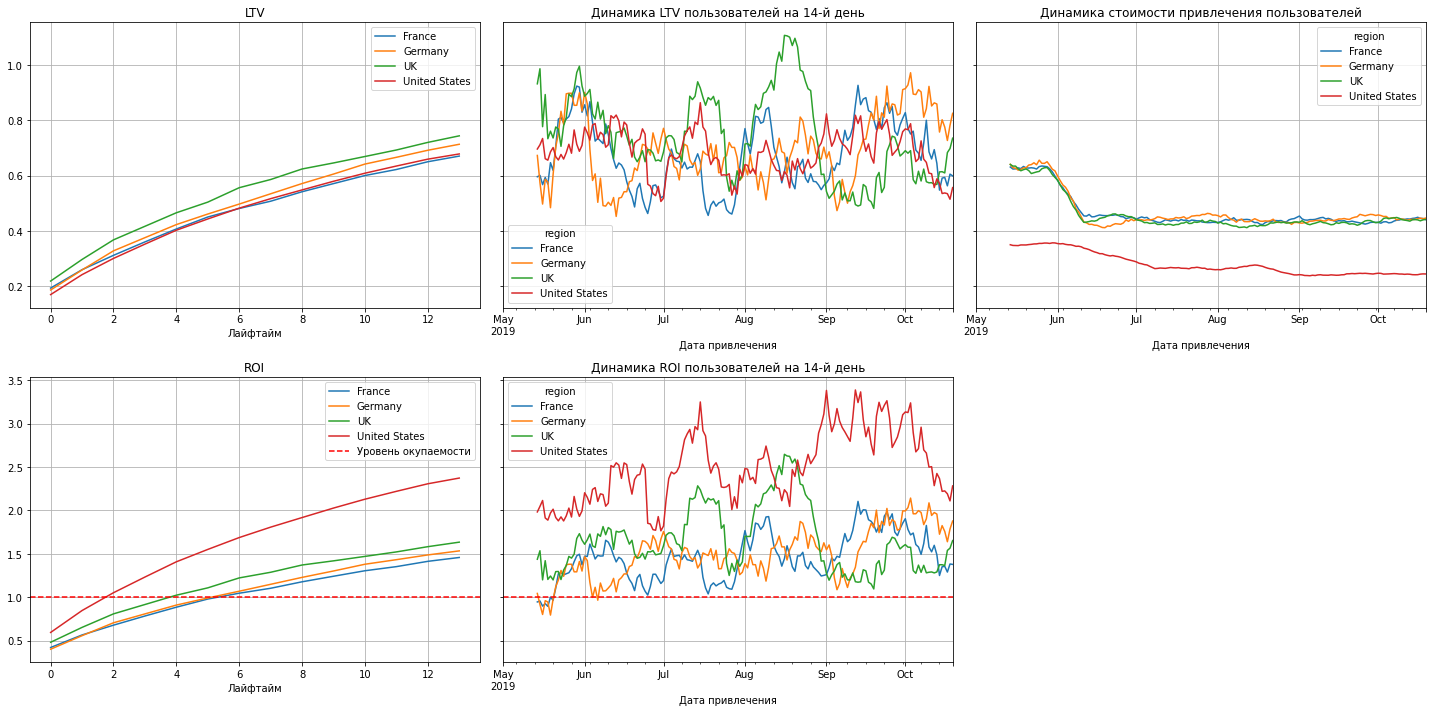

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

ВЫВОД: LTV пользователей из США самый высокий, при этом стоимость привлечения пользователей самая высокая, и именно ROI по США не выходит на уровень окупаемости, и очевидно, тянет вниз общий показатель ROI

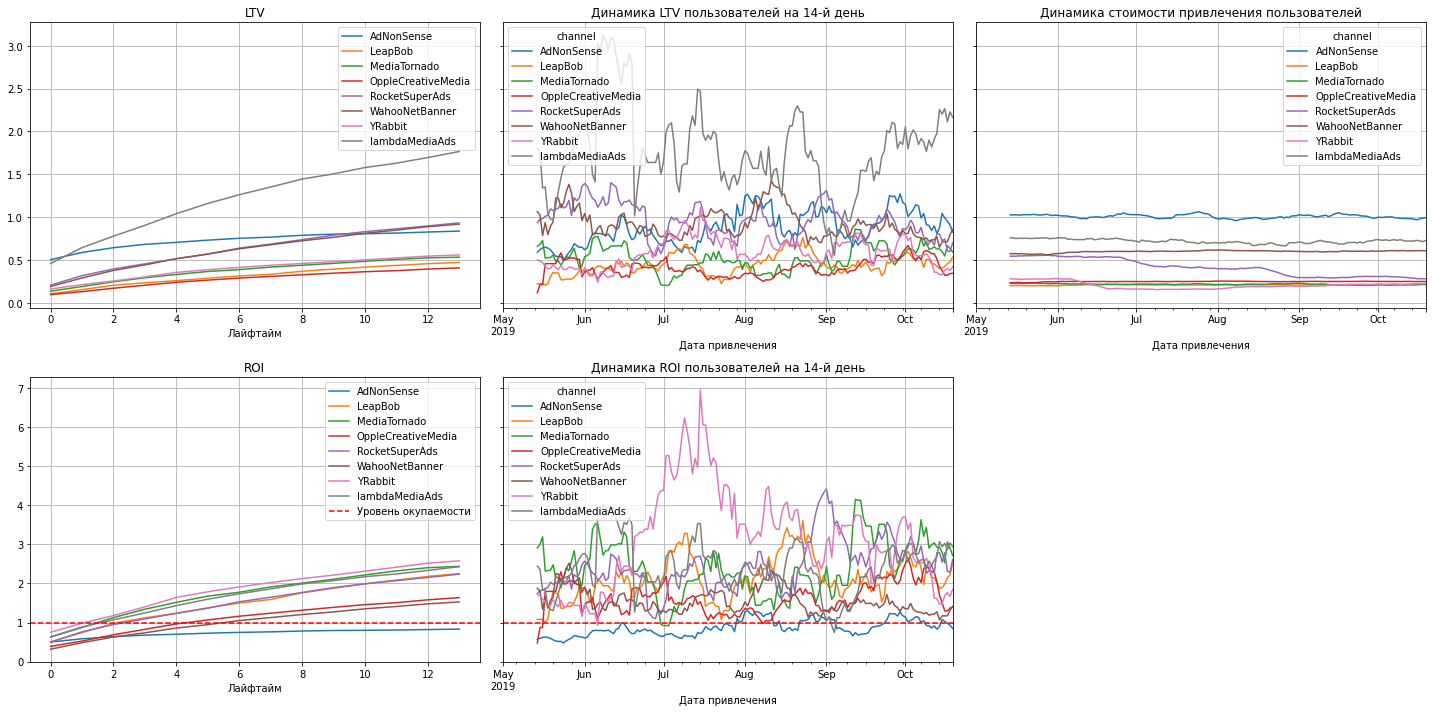

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

ВЫВОД: Стоимость привлечения пользователей через TipTop неуклонно растет в сравнении с остальными источниками, но не выходит на уровень окупаемости, затраты на привлечение через FaceBoom стабильны, но также не выходят на уровень окупаемости. AsNoneSense тоже ниже уровня окупаемости с близкими к FaceBoom затратами на привлечение.  

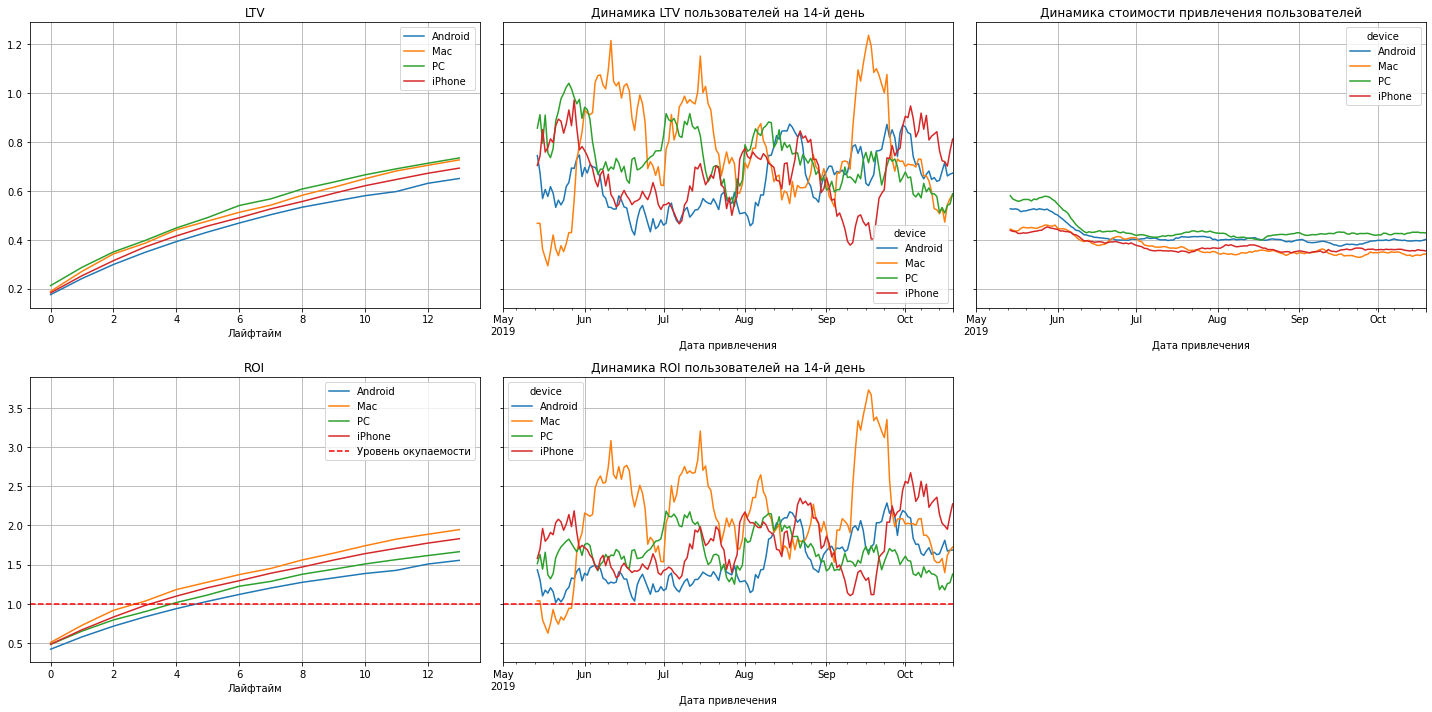

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

ВЫВОД: LTV по всем устройствам примерно одинаково, но привлечение пользователей Mac и iPhone дороже, чем пользователей PC и Android, и это привлечение не преодолевает уровень окупаемости. Впрочем к октябрю привлечение пользователей Android также становятся нерентабельным

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

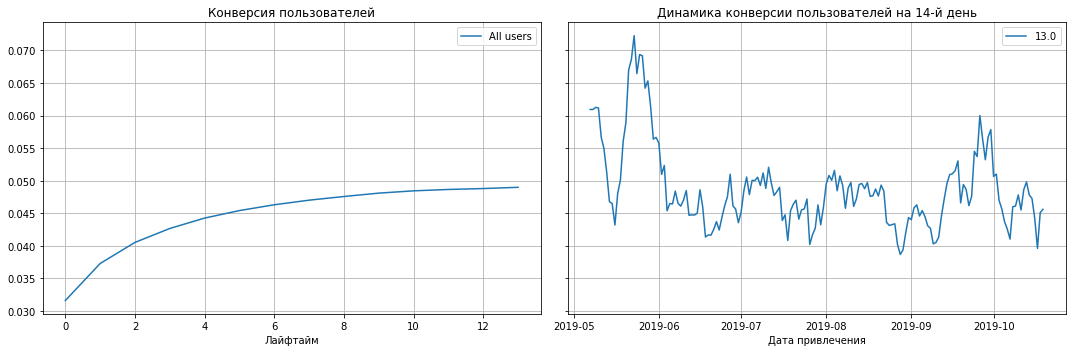

In [ ]:
dimensions = []
# смотрим общую конверсию покупателей

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

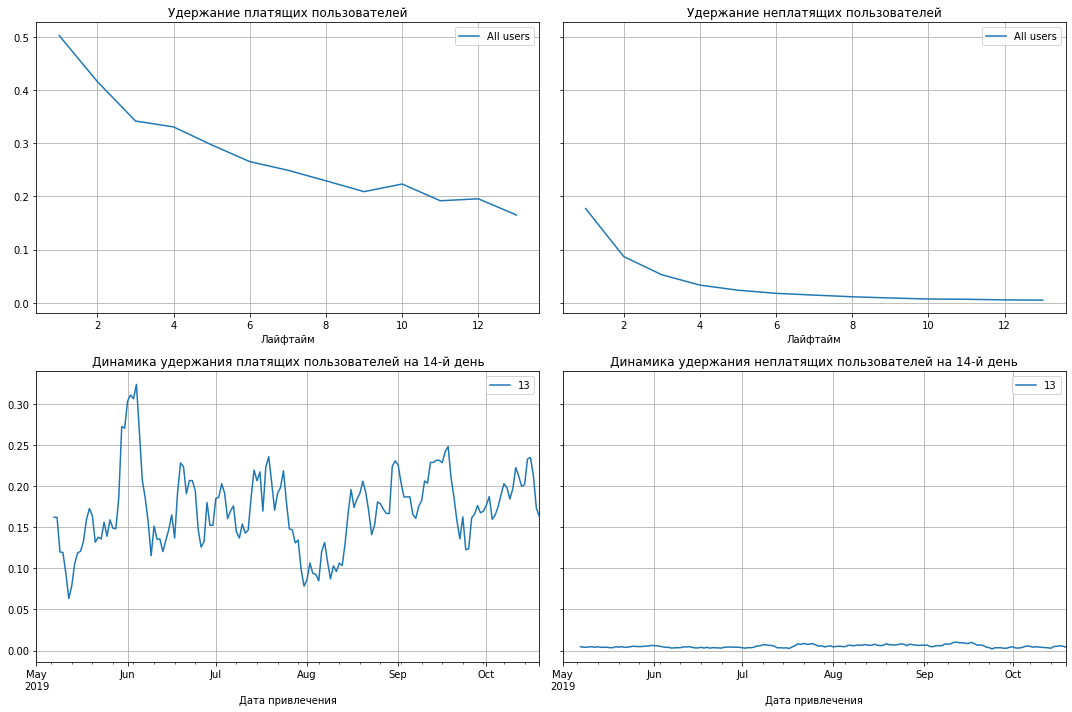

In [ ]:
# смотрим общее удержание покупателей
dimensions = []
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

ВЫВОД: Общая конверсия пользователей по всем параметрам выглядит оптимистично, но график удержания показывает, что привлеченные пользователи быстро уходят, что и делает затраты на привлечение платных пользователей неэффективными. Посмотрим эти показатели в разбивке на устройства, регионы и каналы привлечения:

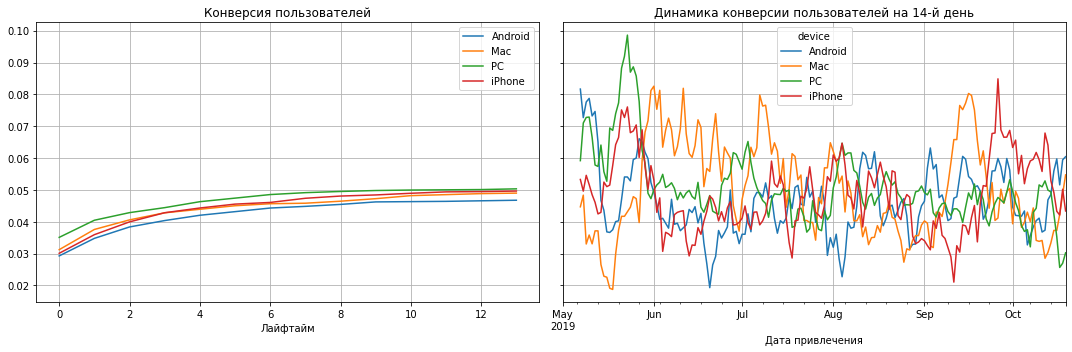

In [ ]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

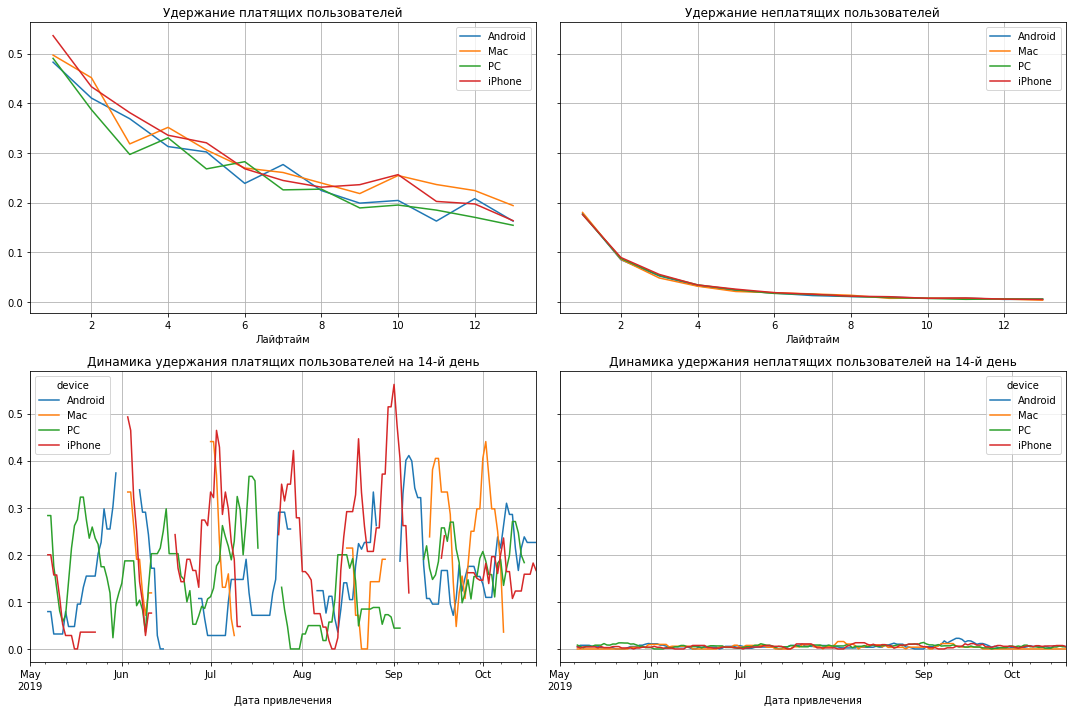

In [ ]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

ВЫВОД: Конверсия по Mac и iPhone выше, чем у PC и Android, но показатели удержания очень слабые, а также мы помним, что по этим устройствам также выше расходы на привлечение, которые не выходят на уровень окупаемости.

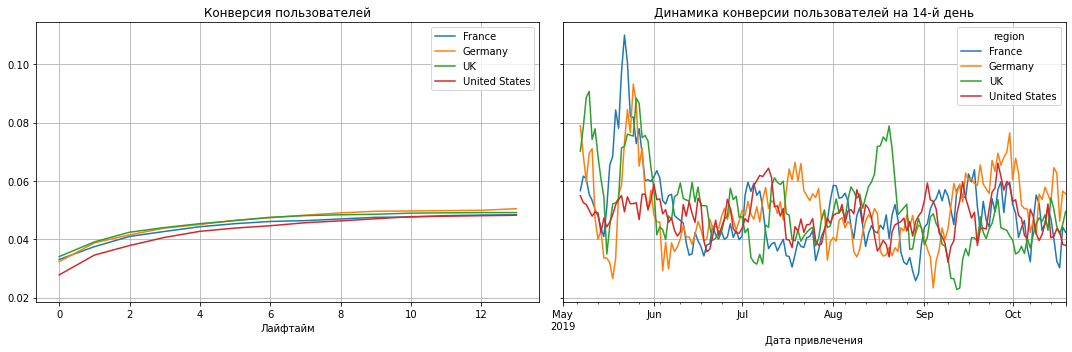

In [ ]:
dimensions = ['region']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

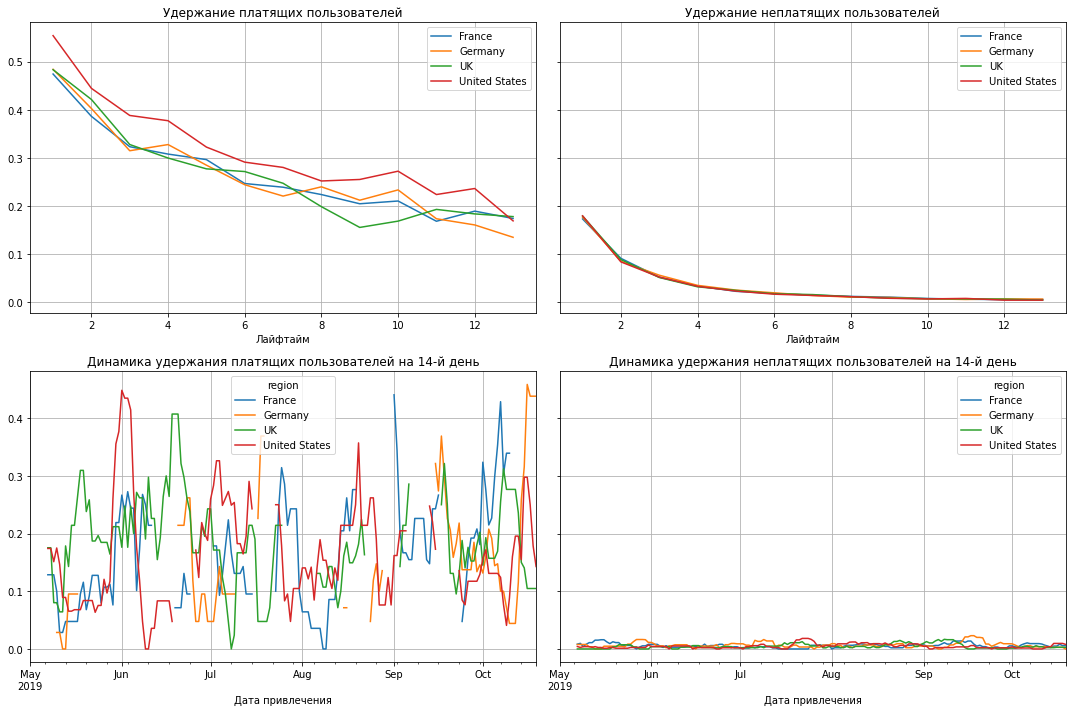

In [ ]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

ВЫВОД: Удержание неплатящих пользователей по всем регионам примерно одинаково, но по США, где самая высокая конверсия, и самый большой отток пользователей

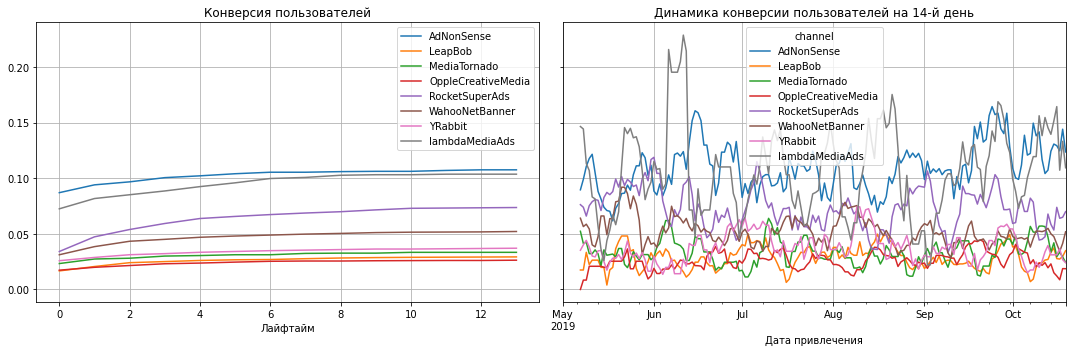

In [ ]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

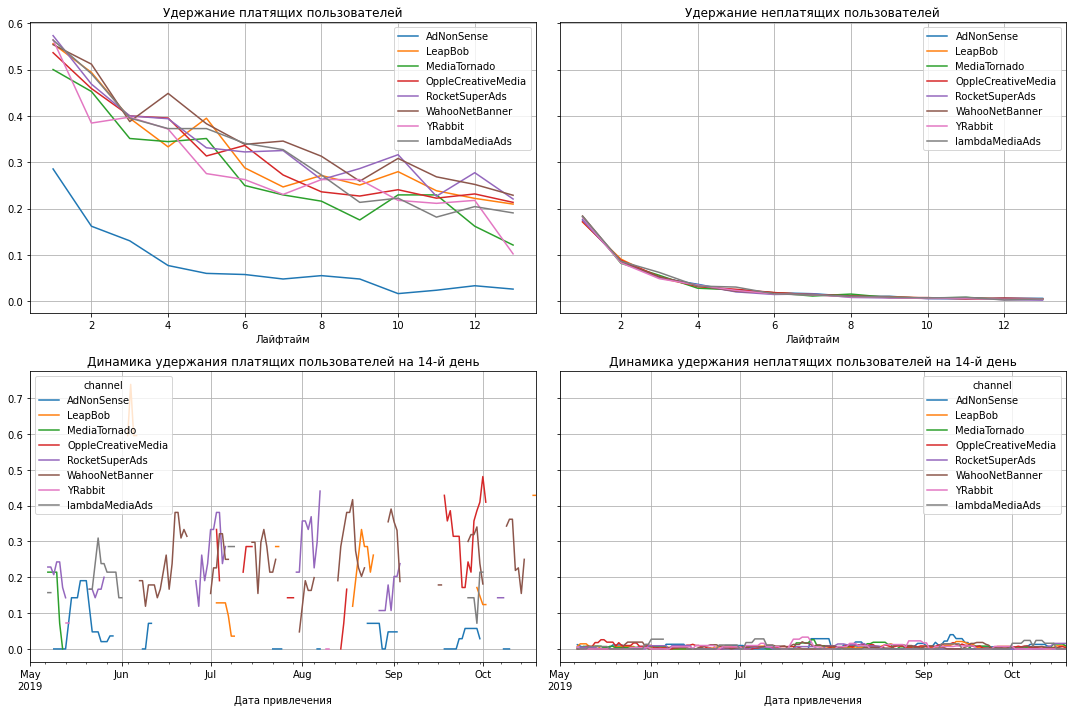

In [ ]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

ВЫВОД: Наибольшую конверсию показывает FaceBoom,  но также и наихудшее удержание. Высокую конверсию и стабильное удержание показывает lambdaMediaAds. Также плохое удержание при невысокой конверсии у AsNoneSense. Остальные рекламные каналы показывают примерно одинаковую конверсию и удержание.  Показатели по неплатящим пользователям примерно одинаковы для всех источников.

<b> ВЫВОД ПО РАЗДЕЛУ <b> :  
<b>LTV держится на примерно одном уровне на протяжении всего периода наблюдений, CAC на протяжении всего эксперимента растёт, в разрезе лайфтайма общий ROI не достигает уровня окупаемости, в динамике до июня ROI выше уровня окупаемости, а с июля пользователи перестают окупаться.  

LTV пользователей из США самый высокий, при этом стоимость привлечения пользователей самая высокая, и именно ROI по США не выходит на уровень окупаемости, и очевидно, тянет вниз общий показатель ROI.   

Стоимость привлечения пользователей через TipTop неуклонно растет в сравнении с остальными источниками, но не выходит на уровень окупаемости, затраты на привлечение через FaceBoom стабильны, но также не выходят на уровень окупаемости. AsNoneSense тоже ниже уровня окупаемости с близкими к FaceBoom затратами на привлечение.  

LTV по всем устройствам примерно одинаково, но привлечение пользователей Mac и iPhone дороже, чем пользователей PC и Android, и это привлечение не преодолевает уровень окупаемости. Впрочем, к октябрю привлечение пользователей Android также становятся нерентабельным, но в данном случае скорее проблема в канале привлечения, а не в самом устройстве.   

Общая конверсия пользователей по всем параметрам выглядит оптимистично, но график удержания показывает, что привлеченные пользователи быстро уходят, что и делает затраты на привлечение платных пользователей неэффективными. Посмотрим эти показатели в разбивке на устройства, регионы и каналы привлечения  

Конверсия по Mac и iPhone выше, чем у PC и Android, но показатели удержания очень слабые, а также мы помним, что по этим устройствам также выше расходы на привлечение, которые не выходят на уровень окупаемости.  

Удержание неплатящих пользователей по всем регионам примерно одинаково, но по США, где самая высокая конверсия, и самый большой отток пользователей.  

Наибольшую конверсию показывает FaceBoom,  но также и наихудшее удержание. Высокую конверсию и стабильное удержание показывает lambdaMediaAds. Также плохое удержание при невысокой конверсии у AsNoneSense. Остальные рекламные каналы показывают примерно одинаковую конверсию и удержание.  Показатели по неплатящим пользователям примерно одинаковы для всех источников.  

### ОБЩИЕ ВЫВОДЫ
   В представленных датасетах нами получен достаточный для анализа объем данных.  
    Наибольше количество пользователей из США - 100002, что составляет 66,66% от всего числа, на втором месте - Великобритания (17575 или 11,72%), на третьем Франция (17450 или 11,63%), и на четвертом - Германия (14981 или 9.99%). По количеству платящих пользователей распределение примерно такое же США - 6902 (77,7%), Великобритания 700 (7,88%), Франция 663 (7,47%) и Германия 616 (6,93%). Региональная конверсия в США 6,9%, в Великобритании 3,98%, во Франции 3,8%, в Германии - 4,11%.  
    По устройствам платящие пользователи распределены таким образом: Mac - 1912 (6.36%), iPhone - 3382 (6.21%), Android (5.85%), PC 1537 (5.05%), при этом в абсолютных показателях лидирует iPhone.
Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439, на втором месте FaceBoom - 29144, на третьем TipTop - 19561. Максимальное количество пользователей пришло через бесплатный канал (органика) - 56439, на втором месте FaceBoom - 29144, на третьем TipTop - 19561. При этом в статус платящих больше всего перешли пользователи, привлеченные через FaceBoom (12.2%), затем AdNonSense (11.34%), и на третьем месте - lambdaMediaAds (10.47%).  

Реклама перестает окупаться на 2й неделе лайфтайма в целом. Есть отдельные каналы, регионы, и каналы, которые тянут показатель ROI вниз: это пользователи из США, пользователи, которые заходят с Mac и iPhone и пользователи, привлеченные через дорогие рекламные каналы.
Т.к. нет данных по тому, какой именно развлекательный контент содержит это приложение, можно предплоложить, что проблемы в регионе могли возникнуть в связи с тем, что:  
- приложение не учитывает региональных особенностей (какие нибудь километры вместо миль, килограмы вместо фунтов, региональные привязки)
- возможно пользователи входят через VPN, но они не в США, что технически меняет статистику
  
Высокая конверсия и низкое удержание в FaceBoom при существенных рекламных издержках могут говорить о том, что сам рекламный контент не очень удачный, либо реклама ориентирована не на ту целевую аудиторию. В данном случае имеет смысл уточнить для каких возрастов, гендеров или социальных слоев создано приложение и использовать более таргетированные способы продвижения через соцсети. Отдельный вопрос вызывает решение продолжать увеличивать рекламный бюджет в TipTop при том, что ROI за первые несколько месяцев так и не достиг окупаемости.

Конверсия по Mac и iPhone выше, чем у PC и Android, но мы помним, что по этим устройствам также выше расходы на привлечение, которые не выходят на уровень окупаемости. Возможно для этих платформ стоит оптимизировать приложение.

<b> РЕКОМЕНДАЦИИ: <b>

1. Оптимизировать рекламный бюджет через соцсети, проверить содержание рекламного контента в FaceBoom и TipTop, рассмотреть возможности таргетированной рекламы, возможно через блогеров с близкими по требованиям характеристиками аудитории.
2. Снизить сотрудничество с AdNoneSense и рассмотреть расширение взаимодействия c lambdaMediaAds
3. Изучить возможности продвижения приложения во Франции, Германии и Великобритании.
4. Обсудить с разработчиками возможности оптимизации приложений для Mac и iPhone

В целом каналы Yrabbit и RocketSuperAds при своей невысокой стоимости привлечения (0,22 и 0,41) и небольшой доле расходов в общем бюджете, выходят на уровень окупаемости, при этом конверсия первого канала довольно небольшая (менее 4%), второго чуть больше (почти 8%). Безусловно, имеет смысл умеренно увеличивать бюджет этих рекламных каналов, наблюдая за изменением показателей.